#### Preliminaries - import main libraries

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from scipy import ndimage as ndi
from skimage import color, io, exposure, feature
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects, disk, opening
from skimage.measure import find_contours, approximate_polygon
from skimage import transform as tf

%matplotlib inline

#### Import test image

In [2]:
# import from url https://www.marinegeosolutions.com/data-examples.htm
#url = 'https://www.marinegeosolutions.com/data-examples.htm'
#img = np.asarray(io.imread(url))[:,:,:3] # with removing alpha channel
img = np.asarray(io.imread('test images new/MBES_B.jpg'))[:,:,:3]

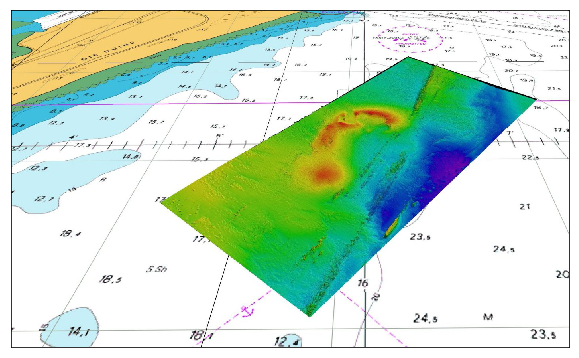

In [3]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(img,  interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()
#fig.savefig('input.png', dpi=400, bbox_inches='tight', pad_inches=0) 


#### Preporcessing - THIS ALSO NEEDS TO BE TURNED INTO A HELPER FUNCTION, with a couple of enhancement options.
#### For example this image needed a bit of opening. You could give it as an option where data is clearly separated form background but there are lines.

In [20]:
# Gray scal conversion and contrast stretching
gry = color.rgb2gray(img);
p2, p95 = np.percentile(gry, (2, 98))
rescale = 1-opening(1-(exposure.rescale_intensity(gry, in_range=(p2, p95))), disk(2))

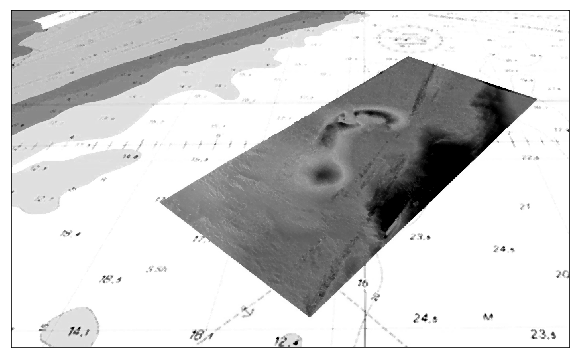

In [21]:
# plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(rescale,  interpolation = 'none', cmap = 'gray')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()
#fig.savefig('input.png', dpi=400, bbox_inches='tight', pad_inches=0) 

#### Get section

In [22]:
from mycarta_im_functions_Matt import find_largest
mask = find_largest(rescale)

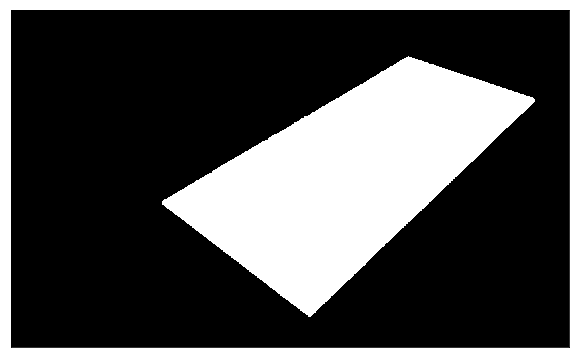

In [23]:
# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(mask, cmap='gray', interpolation = 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

#fig.savefig('noholes.png', dpi=400, bbox_inches='tight', pad_inches=0) 

#### Rectify

In [24]:
from mycarta_im_functions_Matt import rectify_seismic
warped = rectify_seismic(img, mask)

[]

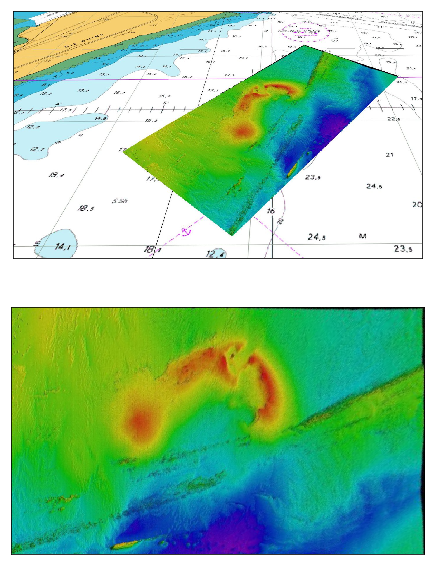

In [25]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 10))

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].xaxis.set_ticks([])
ax[0].yaxis.set_ticks([])

ax[1].imshow(warped, cmap=plt.cm.gray)
ax[1].xaxis.set_ticks([])
ax[1].yaxis.set_ticks([])